In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
data = pd.read_csv('TCS_stock_history.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [3]:
# Check for null values
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [4]:
 # Convert numeric columns if required
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

In [5]:
# Fill any remaining NaN values
data.ffill(inplace=True)


In [6]:
df=data.copy()

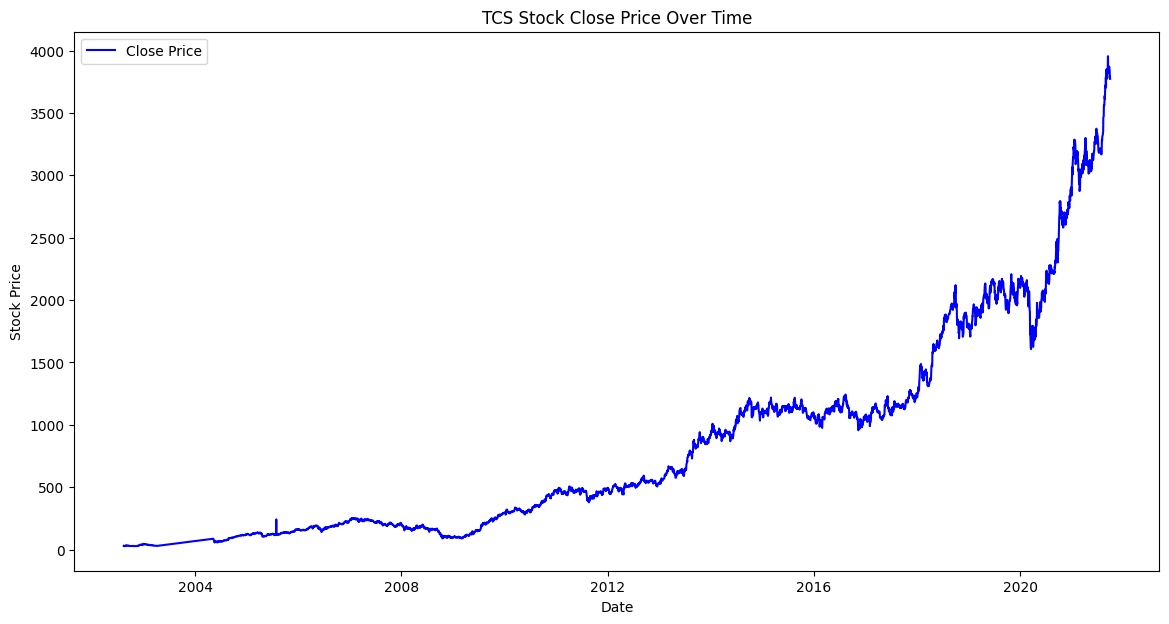

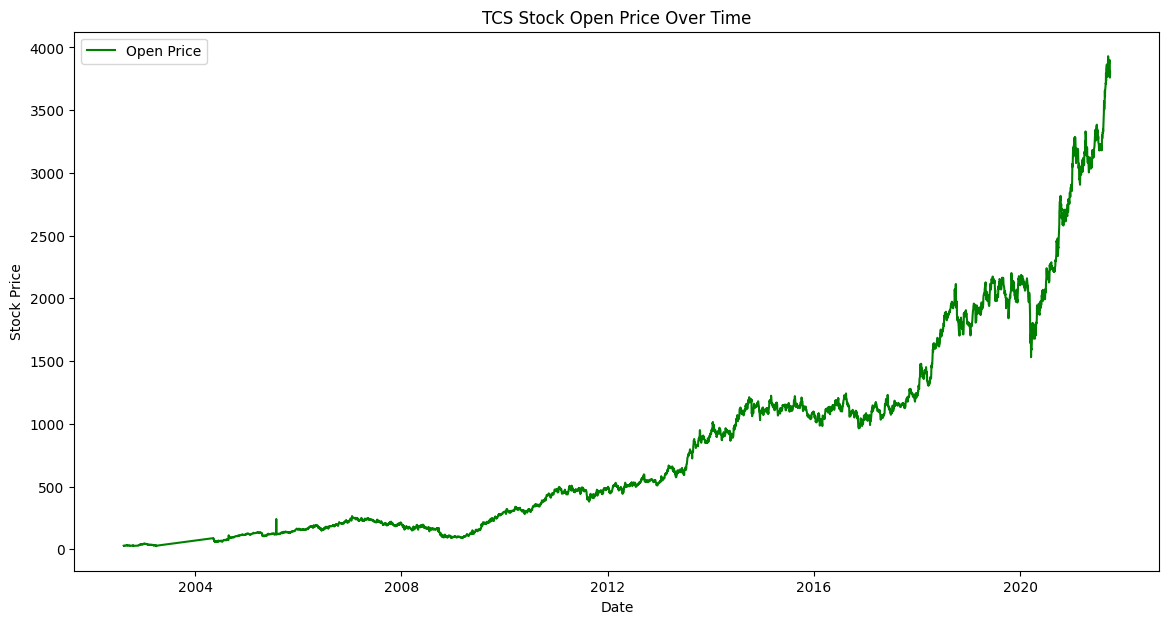

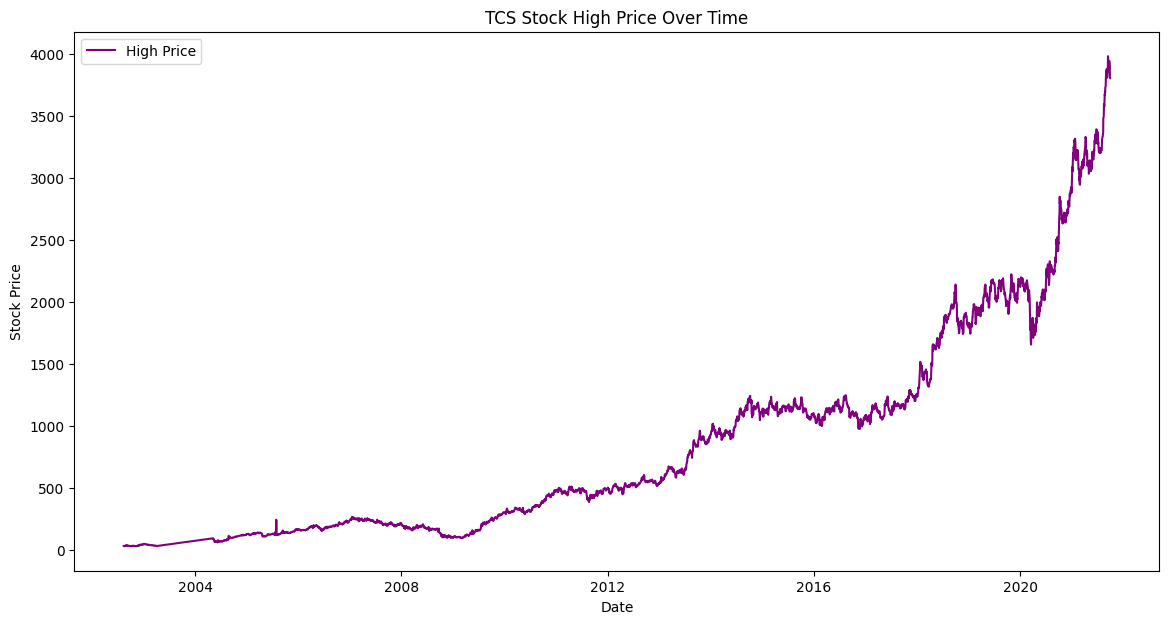

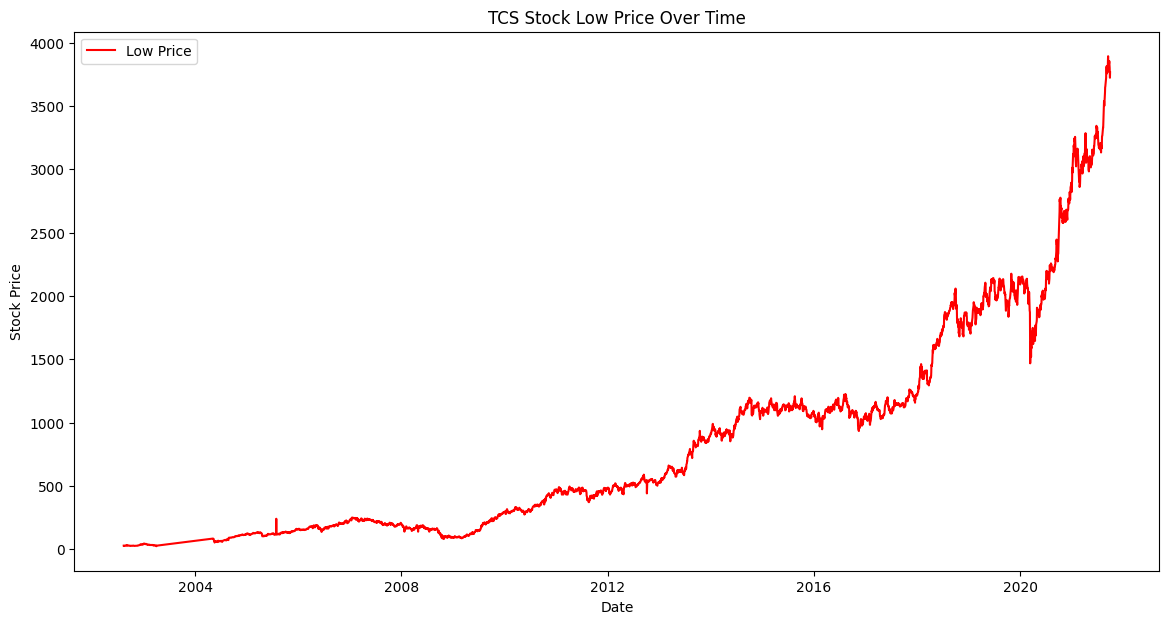

In [7]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

# Plotting Open price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], color='green',
label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Open Price Over Time')
plt.legend()
plt.show()

# Plotting High price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['High'], color='purple',
label='High Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock High Price Over Time')
plt.legend()
plt.show()

# Plotting Low price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Low'], color='red',
label='Low Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Low Price Over Time')
plt.legend()
plt.show()

In [8]:
# Calculating 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

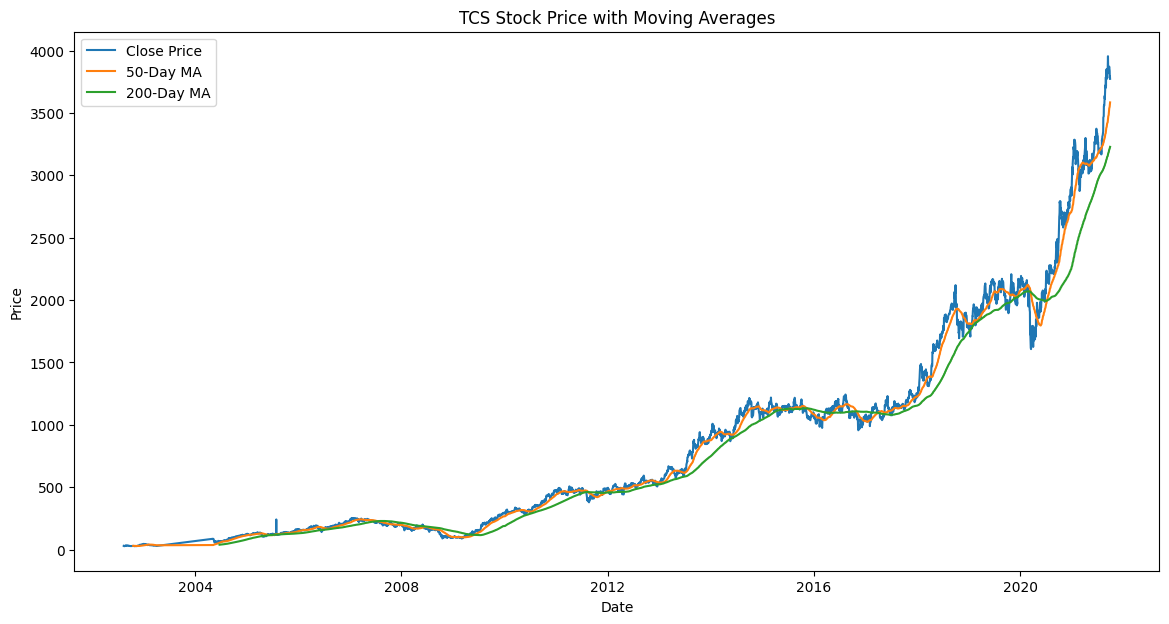

In [9]:
# Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [10]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
 # Lag Features
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

In [11]:
# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
 'Day_of_Week', 'Month']]
y = data['Close']
 # Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
 # Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
 # Predictions
y_pred = model.predict(X_test)
 # Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,
 y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.04992998516231
R-Squared Score: 0.9999438356582193


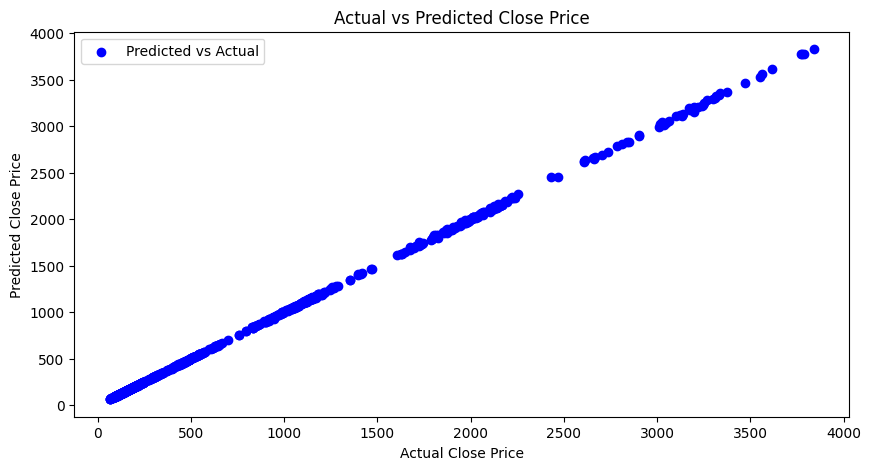

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

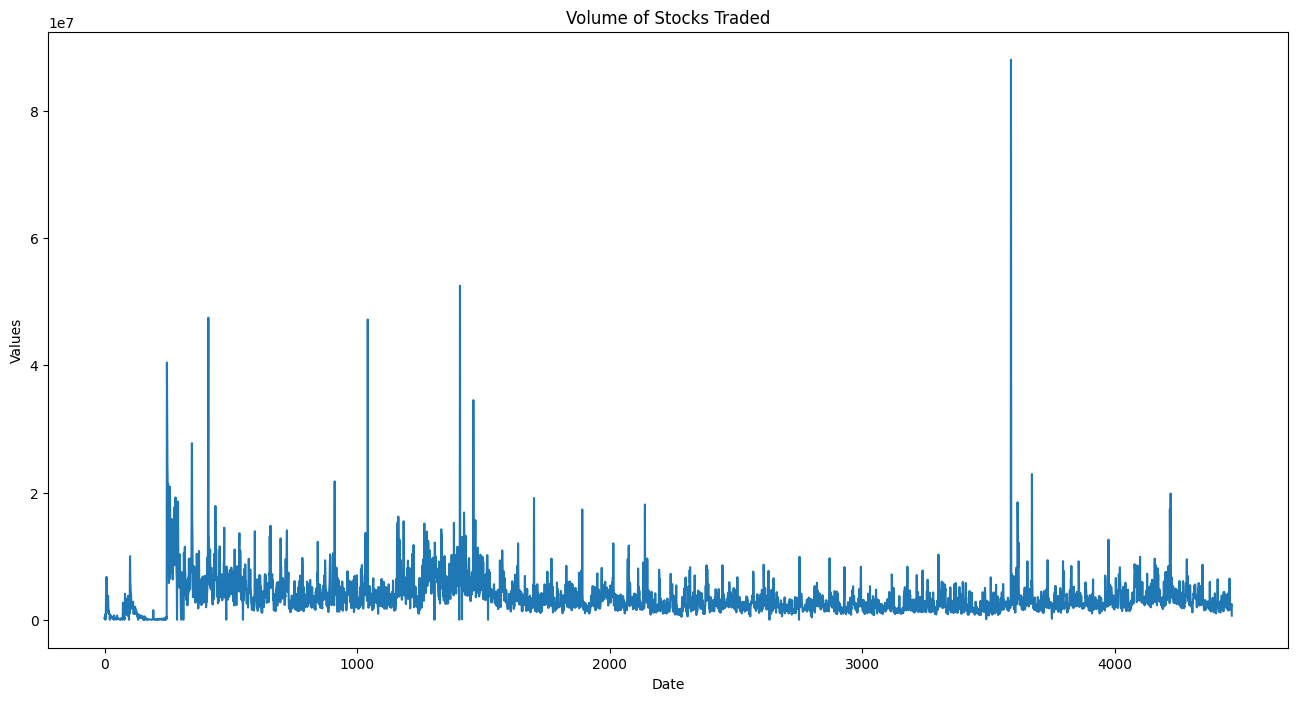

In [13]:
plt.figure(figsize=(16,8))
df['Volume'].plot()
plt.title('Volume of Stocks Traded')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

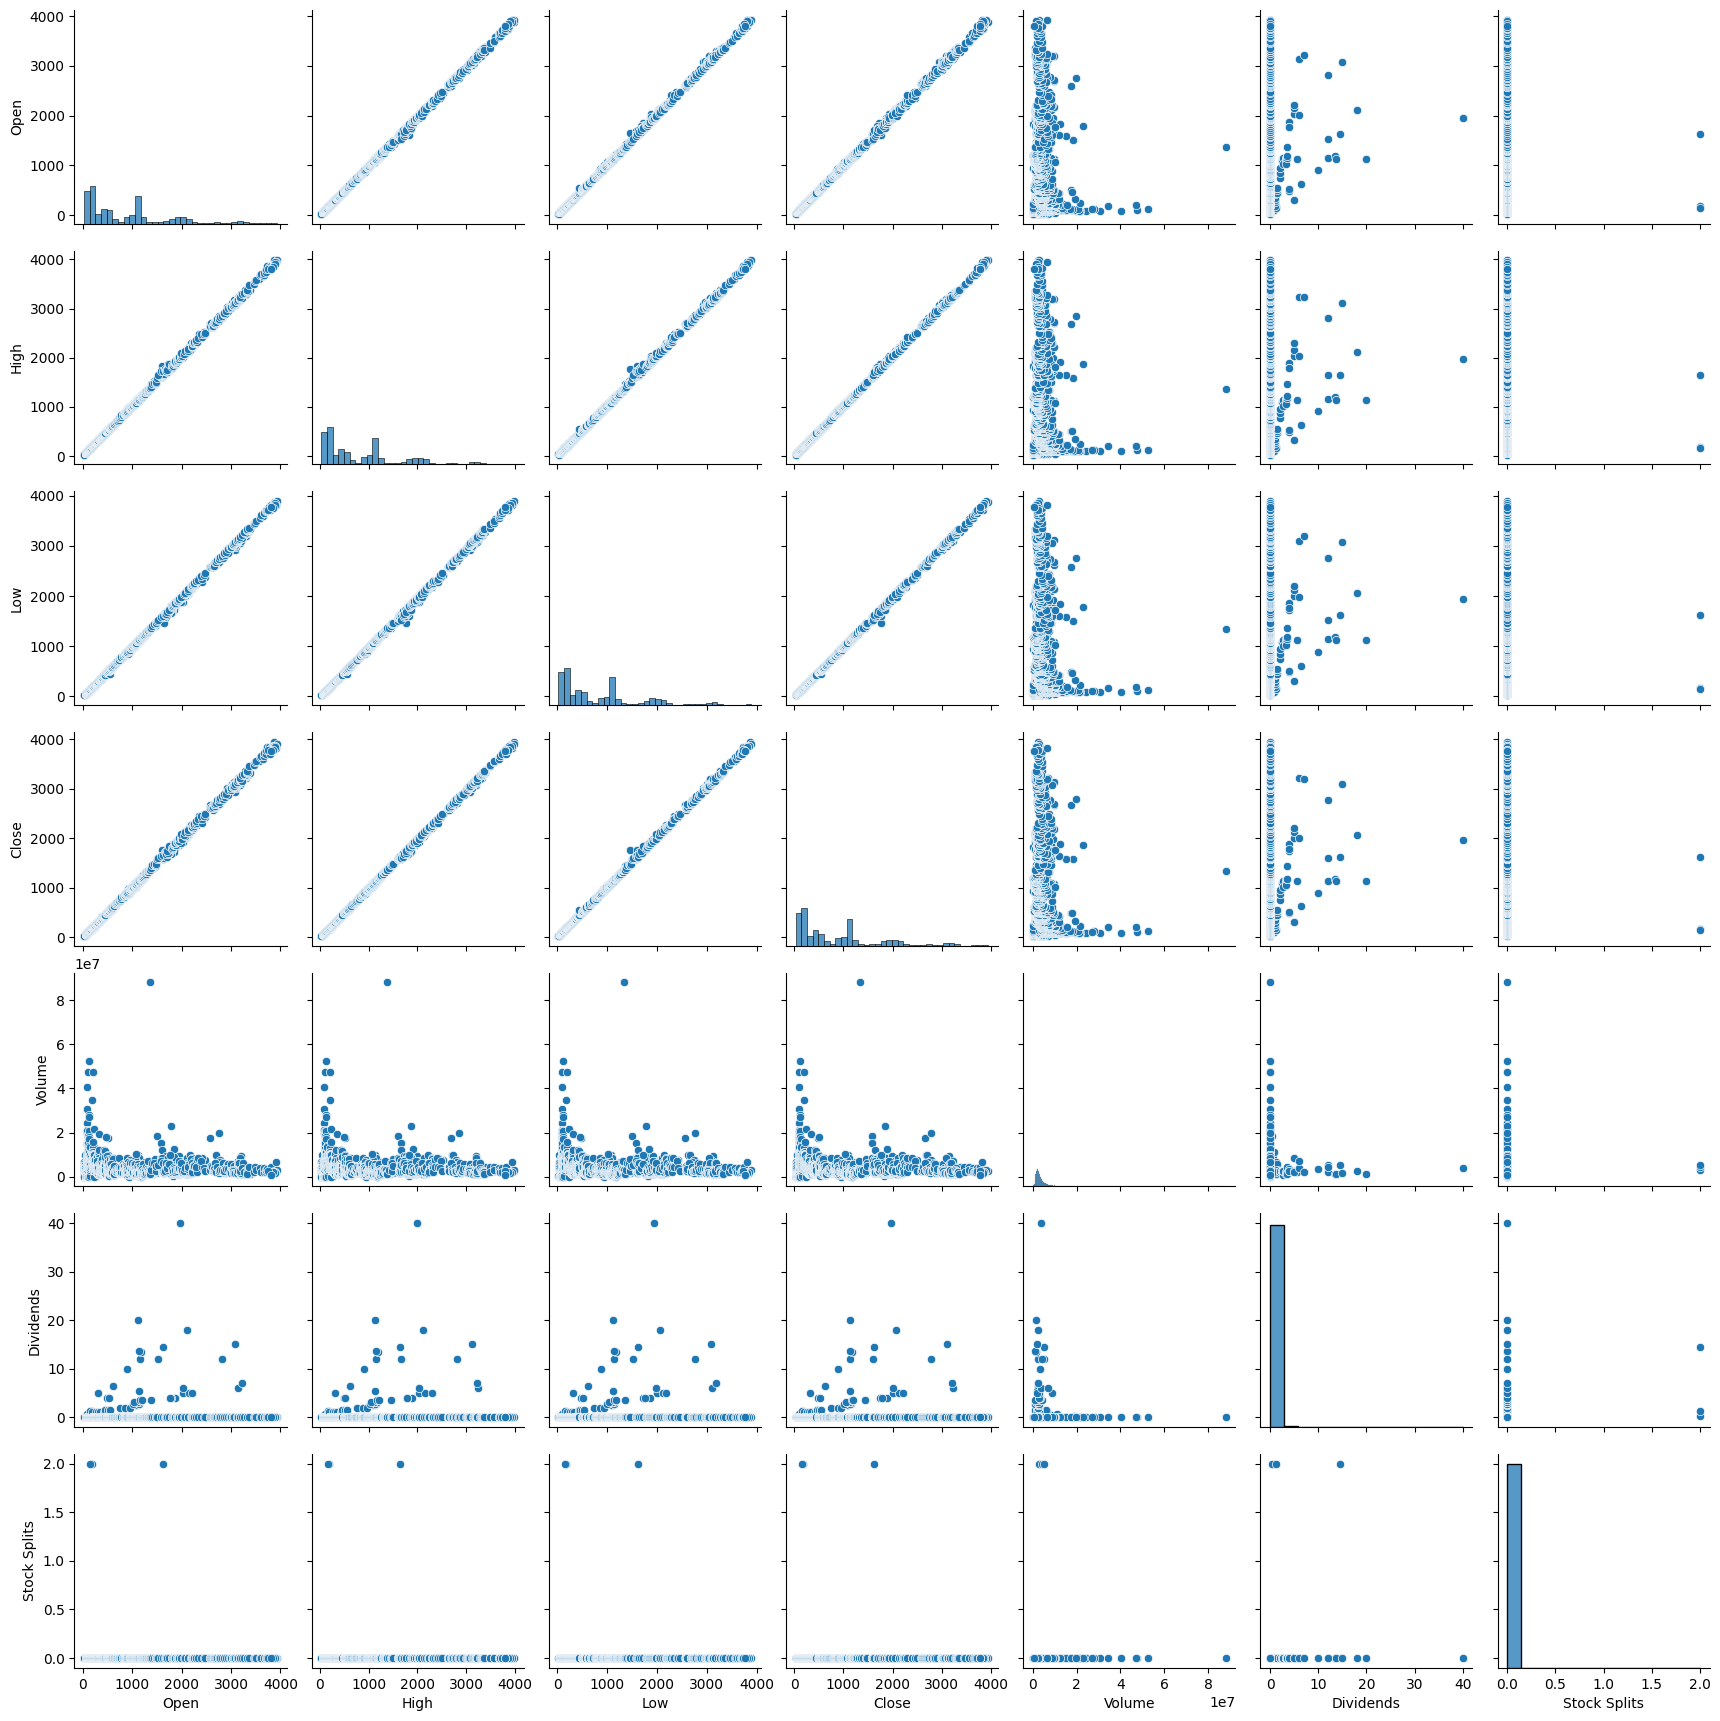

In [14]:
sns.pairplot(df)
plt.show()

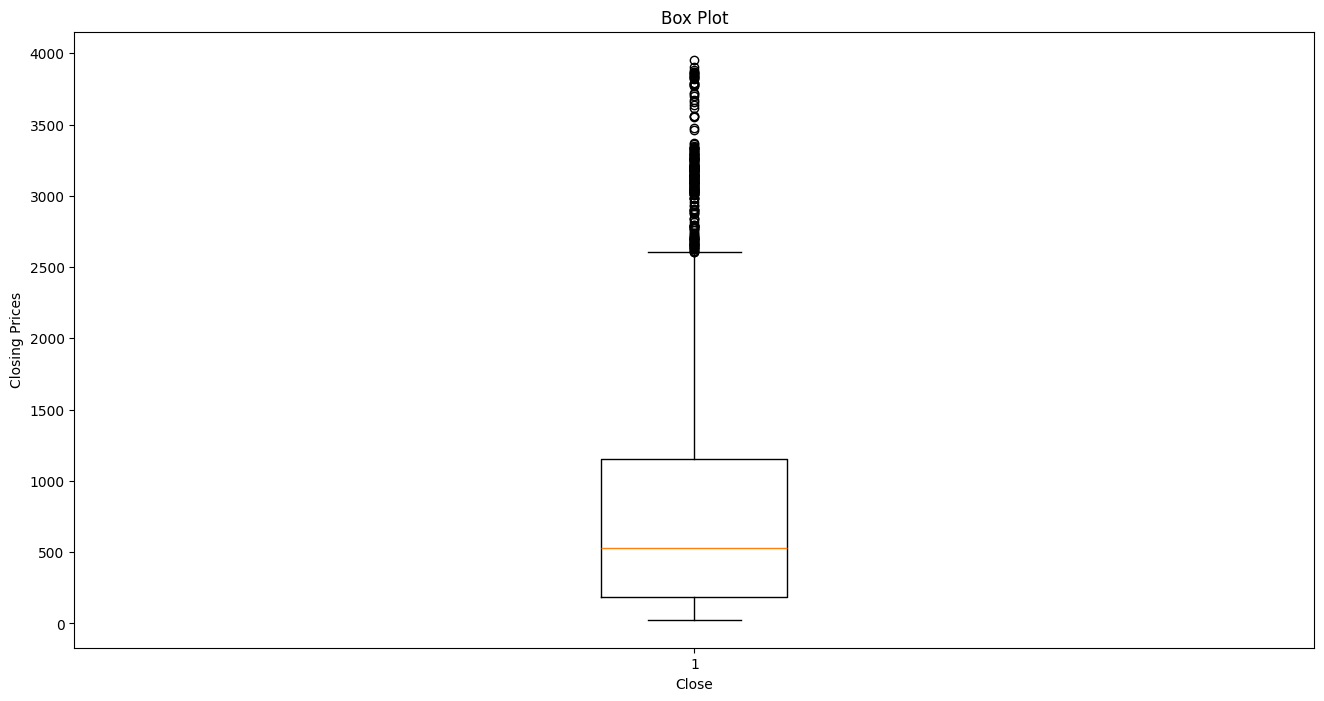

In [15]:
# Box Plot
plt.figure(figsize=(16,8))
plt.boxplot(df['Close'])
plt.xlabel('Close')
plt.ylabel('Closing Prices')
plt.title('Box Plot')
plt.show()

In [16]:
print(df.columns)



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [17]:
# Step 1: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Set 'Date' as index
df.set_index('Date', inplace=True)


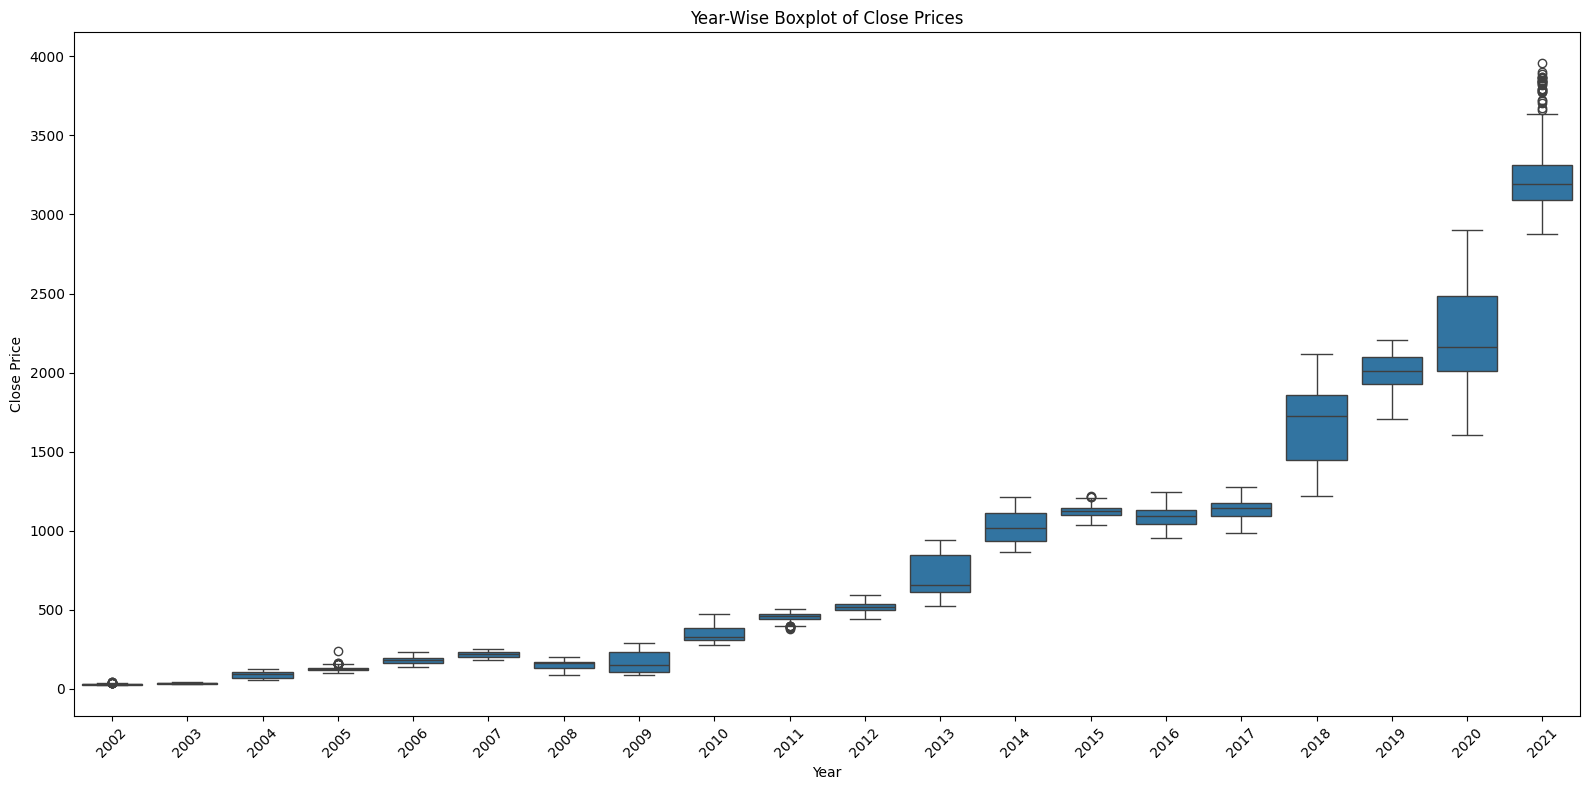

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=df.index.year, y=df['Close'], ax=ax)

# Labeling
ax.set_title('Year-Wise Boxplot of Close Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Close Price')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df['Year'] = df.index.year
df['Month'] = df.index.month

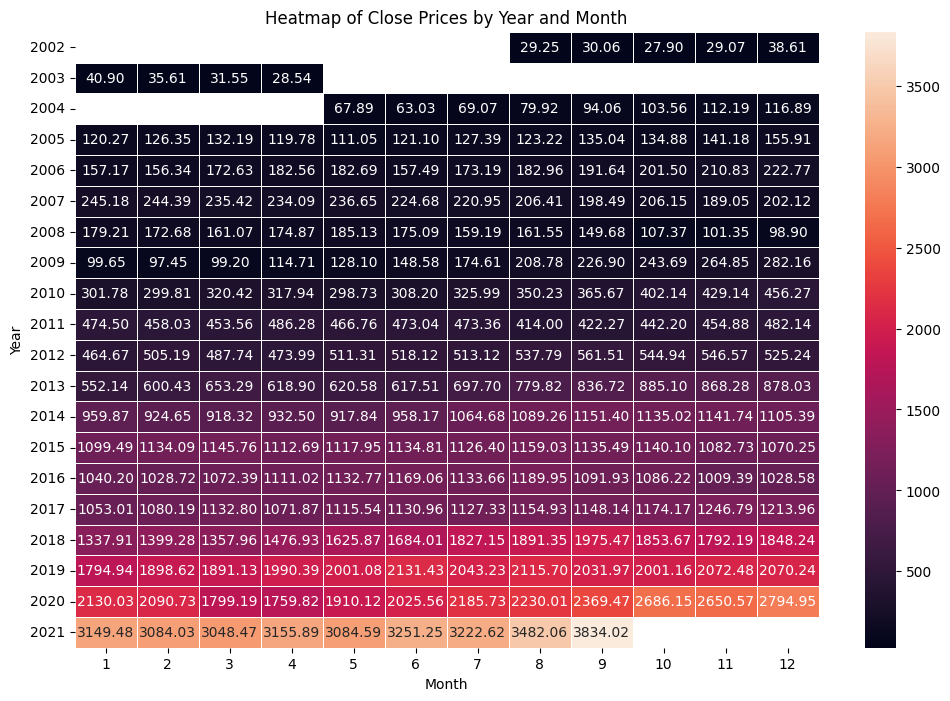

In [20]:
pivot_df = df.pivot_table(index='Year', columns='Month', values='Close', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df,annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Close Prices by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [21]:
df1=data.copy()

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Failed to reject the null hypothesis — Data is **not** stationary.")
    else:
        print("Rejected the null hypothesis — Data is stationary.")

# Example usage:
adf_test(df1['Close'])


ADF Statistic: 4.658328128066426
p-value: 1.0
Failed to reject the null hypothesis — Data is **not** stationary.


In [23]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Example adf_test function
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Failed to reject the null hypothesis — Data is NOT stationary.")
    else:
        print("Rejected the null hypothesis — Data is stationary.")

# Step-by-step fix:
# 1. Pick one numeric series — e.g., Close price
close_values = df1['Close'].values  # NumPy array

# 2. Use diff from statsmodels
diffed_close = diff(close_values, k_diff=1)  # NumPy array

# 3. Convert to Series (drop 1 row for index alignment)
diffed_close_series = pd.Series(diffed_close, index=df1.index[1:])

# 4. Run ADF test
adf_test(diffed_close_series)


ADF Statistic: -14.994665423790261
p-value: 1.1122314243641433e-27
Rejected the null hypothesis — Data is stationary.


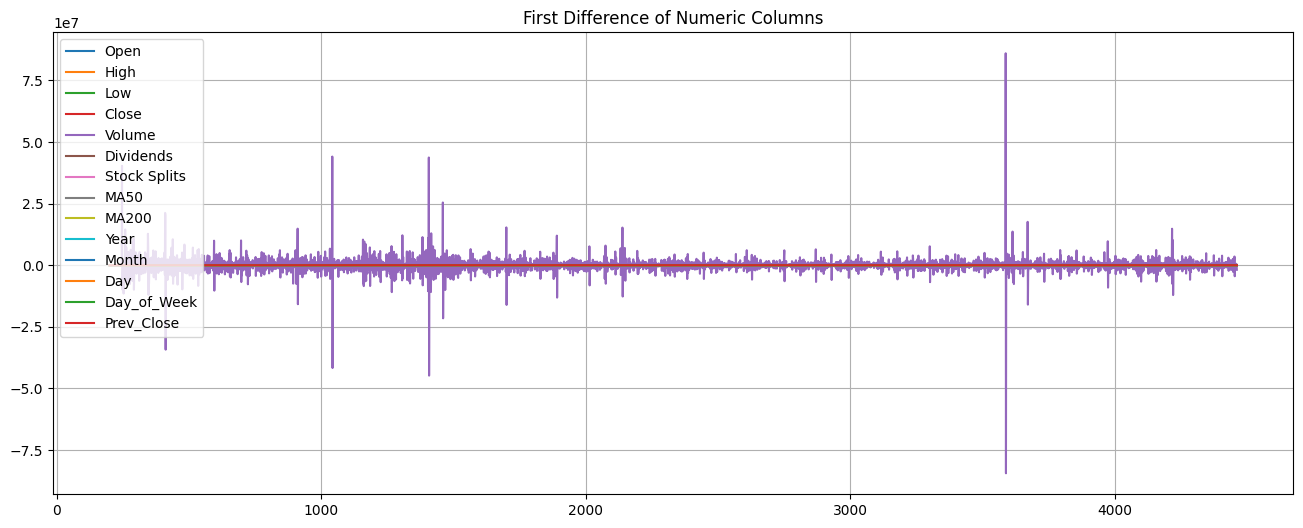

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your full DataFrame and has datetime or other non-numeric columns

# 1. Select only numeric columns
df1_numeric = df1.select_dtypes(include='number')

# 2. Apply first difference
df_1 = df1_numeric.diff().dropna()

# 3. Plot
plt.figure(figsize=(16, 6))
plt.plot(df_1)
plt.title("First Difference of Numeric Columns")
plt.legend(df_1.columns)
plt.grid(True)
plt.show()


In [25]:
corel= data.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Year,Month,Day,Day_of_Week,Prev_Close
Date,1.000000,0.905950,0.906191,0.905818,0.906053,-0.268938,0.060886,-0.008529,0.912443,0.924093,0.998379,-0.021818,-0.000786,0.001224,0.906223
Open,0.905950,1.000000,0.999883,0.999887,0.999776,-0.198837,0.057655,-0.008115,0.996948,0.989297,0.903899,-0.009586,-0.000442,0.000601,0.999935
High,0.906191,0.999883,1.000000,0.999860,0.999910,-0.196315,0.057962,-0.007995,0.997019,0.989460,0.904173,-0.010224,0.000025,0.000428,0.999846
Low,0.905818,0.999887,0.999860,1.000000,0.999896,-0.200474,0.057832,-0.008018,0.996792,0.989098,0.903744,-0.009185,-0.000204,0.000269,0.999838
Close,0.906053,0.999776,0.999910,0.999896,1.000000,-0.198311,0.058102,-0.008033,0.996858,0.989252,0.904005,-0.009692,0.000146,0.000202,0.999729
Volume,-0.268938,-0.198837,-0.196315,-0.200474,-0.198311,1.000000,-0.013343,0.003861,-0.202287,-0.208166,-0.267088,-0.023877,0.055815,0.048135,-0.198644
Dividends,0.060886,0.057655,0.057962,0.057832,0.058102,-0.013343,1.000000,0.142424,0.059121,0.061458,0.060757,-0.001680,0.012632,-0.003745,0.057681
Stock Splits,-0.008529,-0.008115,-0.007995,-0.008018,-0.008033,0.003861,0.142424,1.000000,-0.009252,-0.010607,-0.008394,-0.004128,0.027824,0.012677,-0.007971
MA50,0.912443,0.996948,0.997019,0.996792,0.996858,-0.202287,0.059121,-0.009252,1.000000,0.994216,0.910383,-0.009882,0.001638,0.000842,0.997014
MA200,0.924093,0.989297,0.989460,0.989098,0.989252,-0.208166,0.061458,-0.010607,0.994216,1.000000,0.922456,-0.017941,0.002603,0.001014,0.989404


In [26]:
# Correlation of features with the target variable (Close Price)
correlation_with_close= df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Year            0.897284
Dividends       0.060179
Stock Splits   -0.006635
Month          -0.011917
Volume         -0.152844
Name: Close, dtype: float64


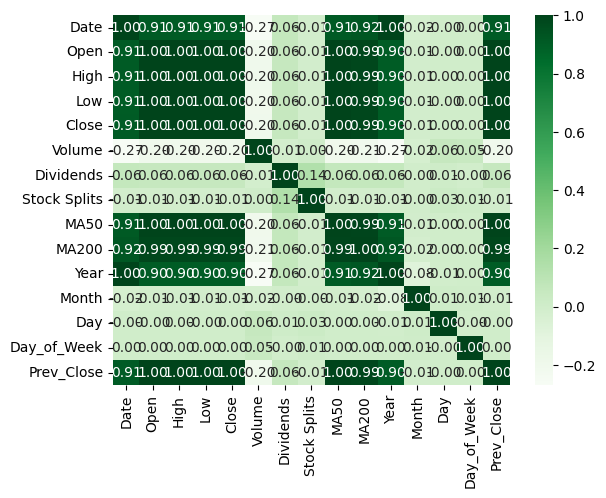

In [27]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

In [28]:
 data['Date'] = pd.to_datetime(data['Date'])
 data = data.sort_values(by='Date')

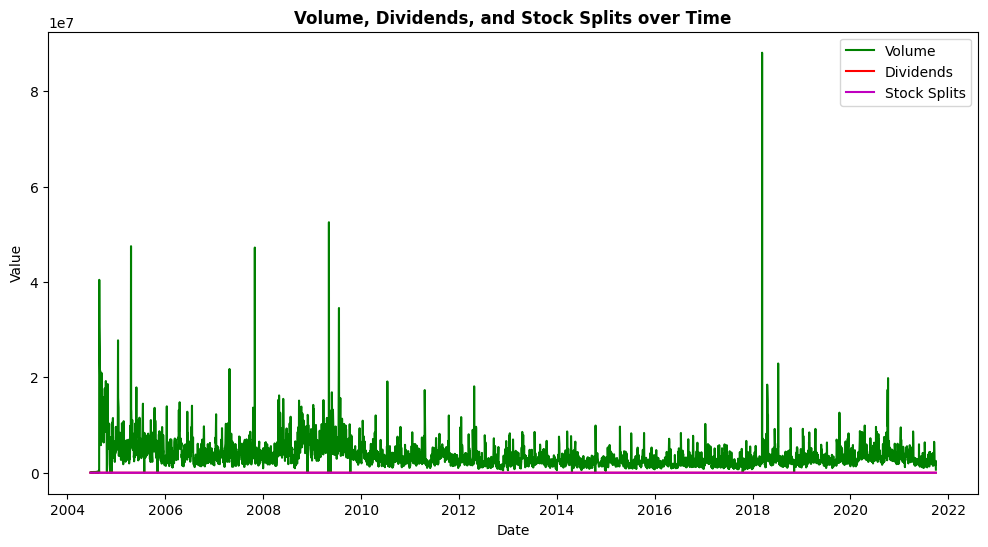

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='g')
plt.plot(data['Date'], data['Dividends'], label='Dividends',
color='r')
plt.plot(data['Date'], data['Stock Splits'], label='Stock Splits',
color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

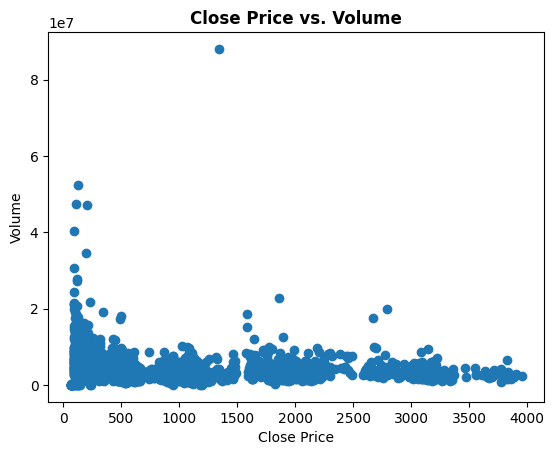

In [30]:
plt.scatter(data['Close'], data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

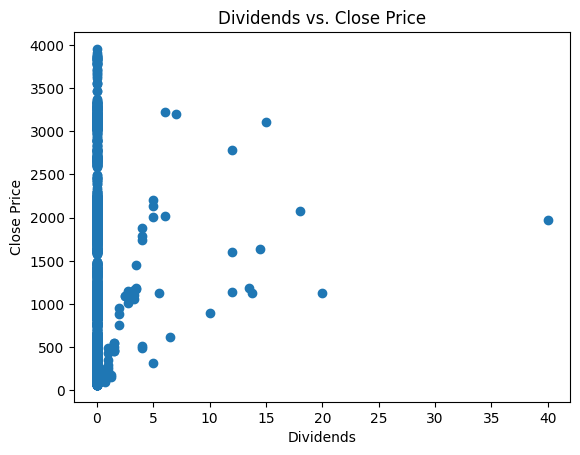

In [31]:
# Dividends vs. Close Price
plt.scatter(data['Dividends'], data['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

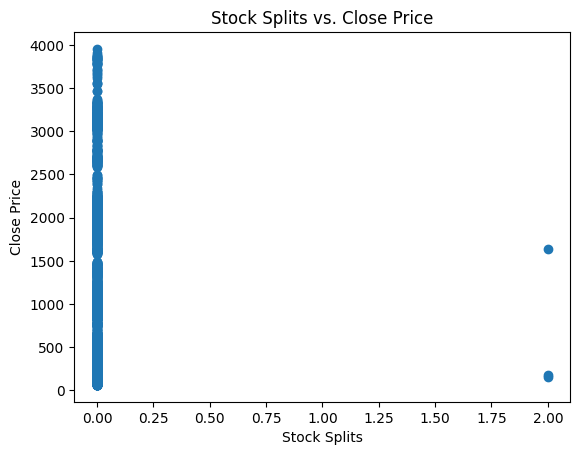

In [32]:
# Stock Splits vs. Close Price
plt.scatter(data['Stock Splits'], data['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

In [33]:
data['Short_MA'] = data['Close'].rolling(window=5).mean()
data['Long_MA'] = data['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1,-1)

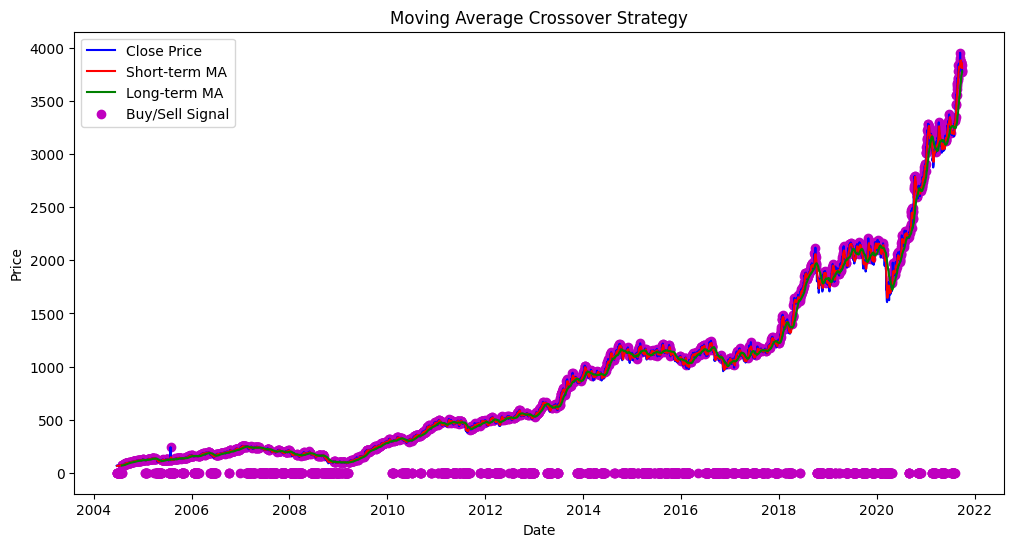

In [34]:
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='b')
plt.plot(data['Date'], data['Short_MA'], label='Short-term MA', color='r')
plt.plot(data['Date'], data['Long_MA'], label='Long-term MA', color='g')
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)
plt.scatter(data['Date'], data['Close'] * data['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

In [35]:
df = data.copy()

In [36]:
 df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [37]:
df.shape

(4264, 19)

In [38]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

In [39]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm


In [41]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ambar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# Set the number of epochs and batch size
epochs = 30
batch_size = 15

In [43]:
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


In [44]:
 # Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [45]:
lstm_predictions = model.predict(X_test_lstm).flatten()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [46]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


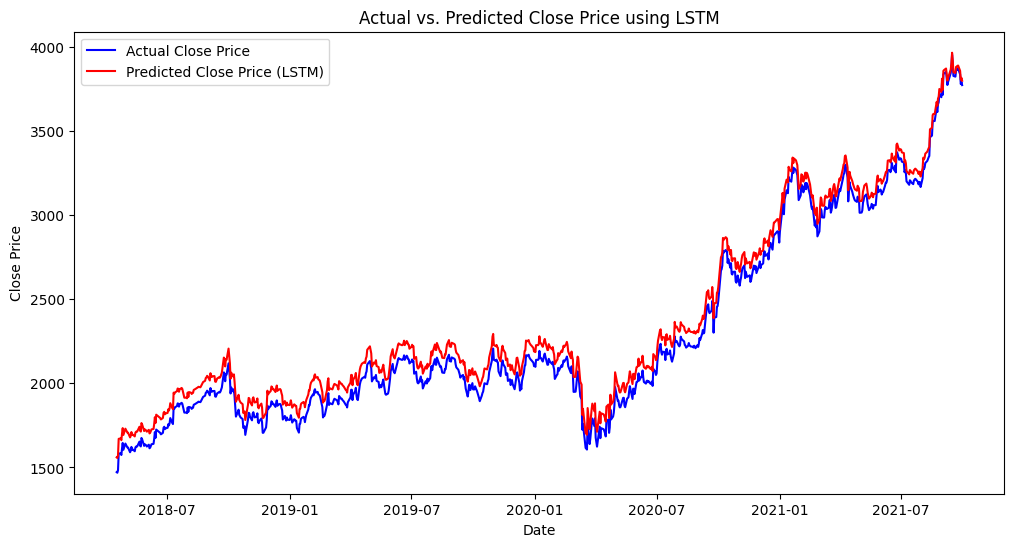

In [47]:
# Visualization of LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


In [48]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(test_data['Close'],
lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 80.39953570298745


In [49]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index=test_data.index[-len(lstm_predictions):]
predictions_df=pd.DataFrame({'Date':date_index,'Predicted_Close':lstm_predictions.flatten()})
predictions_df.to_csv('predictions.csv',index=False)

In [50]:
import pickle
with open('Lstm_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [51]:
# Load the Model From the File
with open('Lstm_Model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [52]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)